In [36]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

<h4>Loading Model<h4>

In [37]:
cnn = tf.keras.models.load_model('G:\\Fruit and veg\\Fruit_recognition\\trained_model.h5')

<h4>Visualization and Performing Prediction on single Image

In [38]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'G:\\Fruit and veg\\Fruit_recognition\\archive (1)\\test',
    labels='inferred',  #labels are generated from the directory structure
    label_mode='categorical', #means data can be anything img,strings,etc encode as a categorical vector
    class_names=None, #to control order
    color_mode='rgb', #type of image color
    batch_size=32, #the number of samples  to estimate the error gradient before the model weight are updated
    image_size=(64, 64), #image size pixel x pixel
    shuffle=True, #select samples at random
    seed= None, #to save the seed of model so it can produce same result
    validation_split= None, #to split data for validation
    subset= None, #this return dataset of training data or validation data or both if validation is set
    interpolation='bilinear', #to estimate the values of unknown data points that fall in between existing, known data points.
    follow_links=False, #if you want to follow other links
    crop_to_aspect_ratio=False #will change the aspect ratio of an image if it doesn't match the targeted images ratio (when True)
)


Found 359 files belonging to 36 classes.


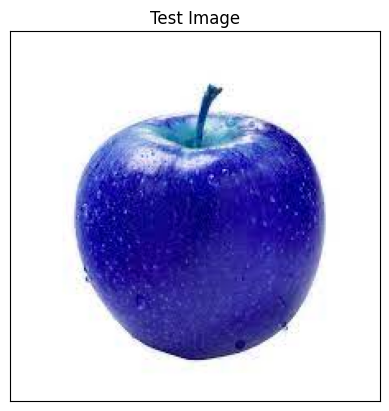

In [39]:
import cv2
image_path='G:\\Fruit and veg\\Fruit_recognition\\images.jpeg'
img = cv2.imread(image_path)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [40]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64)) #resize the image
input_arr=tf.keras.preprocessing.image.img_to_array(image) #convert to input array 
input_arr = np.array([input_arr]) #converting single image to batch
prediction = cnn.predict(input_arr)

1/1 [==============================] - 0s 120ms/step


In [41]:
print(prediction[0])
print(max(prediction[0]))

[9.99999881e-01 3.19221532e-26 4.88295339e-23 6.26692645e-28
 0.00000000e+00 1.37313901e-17 2.28011058e-27 2.34118921e-36
 2.82846330e-23 0.00000000e+00 6.07222378e-25 1.98001835e-21
 4.10202779e-27 1.04689014e-26 1.76143338e-22 1.09861021e-18
 7.39654841e-32 0.00000000e+00 0.00000000e+00 3.79783088e-31
 4.09347411e-21 4.71728064e-35 1.69385075e-07 1.75690726e-33
 0.00000000e+00 1.93497434e-32 2.62980013e-14 4.40011449e-33
 8.67065617e-26 0.00000000e+00 2.64673756e-37 0.00000000e+00
 2.07752436e-25 4.69005834e-10 9.84445158e-28 3.01357528e-21]
0.9999999


In [42]:
# test_set.class_names

In [43]:
result_index = np.where(prediction[0] == max(prediction[0]))
print(result_index[0])

[0]


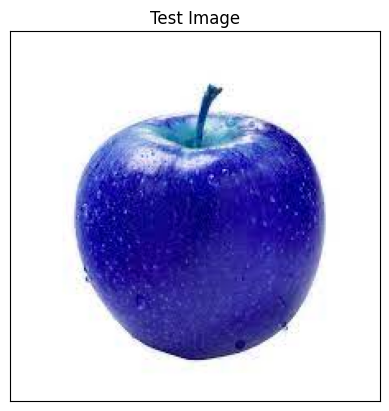

It's a apple


In [44]:
#display image
plt.imshow(image)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()
print('It\'s a {}'.format(test_set.class_names[result_index[0][0]]))

In [45]:
#Single prediction 
print('It\'s a {}'.format(test_set.class_names[result_index[0][0]]))

It's a apple
